In [1]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

In [13]:
img = cv2.imread('happyboy.jpg')

In [3]:
import matplotlib.pyplot as plt

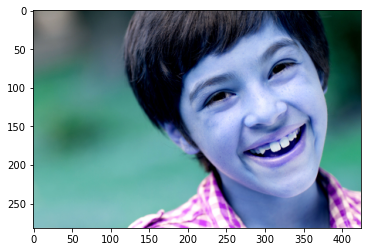

In [14]:
plt.imshow(img) # ->이건 BGR로 나오는것

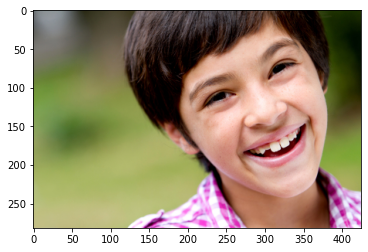

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))#이건 BGR을 RGB로 바꿔서 더 가독성 높은 사진으로 바꾼것

### 감정 분석을 위해 필요한 libray 설치!!

In [6]:
!pip install deepface

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached filelock-3.0.12-py3-none-any.whl (7.6 kB)
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9681 sha256=7ec731002c01d0287c560b1662ead908ff7e43a66691d945b33e316baca9fccb
  Stored in directory: c:\users\ek hong\appdata\local\pip\cache\wheels\ba\e0\7e\726e872a53f7358b4b96a9975b04e98113b005cd8609a63abc
Successfully built gdown


### ->현재 detecting에 오류가 생겼음 -> 오류 해결 및 다른 방식을 사용하는 것도 고려 필요 
### ->이건 1.인자 중 enforce_detection = False 로 두면 해결이 된다!! ,2. action을 emotion만 측정하게 (인종같은 인자 다 버리고)하면 해결 된다!!
### ->사진의 비율도 측정하는데 중요한데, 이는 colab으로 짠 코드 참고!!!

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)
#카메라 켜져있는지 확인
#if not cap.isOpened():
#  cap = cv2.VideoCapture(1)
if not cap.isOpened():
  print("Cannot open webcam")

while True:
    ret, frame = cap.read()#비디오에서 image를 읽어오는 것이다
    result = DeepFace.analyze(frame, actions = ['emotion'],enforce_detection = False)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    for(x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0 ,255, 0), 2)

    font =  cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, result['dominant_emotion'], (50,50),
            font,3,(0,0,255),
            2,
            cv2.LINE_4)
    cv2.imshow('Demo video', frame)

    key = cv2.waitKey(1) & 0xFF

    if key == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()